In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input
from tensorflow.keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
autoencoder = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),
    Dense(49, activation='relu'),
    Dense(64, activation='relu'),
    Dense(28 * 28, activation='sigmoid'),
    Reshape((28, 28, 1))
], name="autoencoder")

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 49)                3185      
                                                                 
 dense_3 (Dense)             (None, 64)                3200      
                                                                 
 dense_4 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         

In [4]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=10,
                shuffle=True)

Epoch 1/10
6000/6000 [==============================] - 4s 717us/step - loss: 0.0215
Epoch 2/10
6000/6000 [==============================] - 4s 719us/step - loss: 0.0118
Epoch 3/10
6000/6000 [==============================] - 4s 726us/step - loss: 0.0099
Epoch 4/10
6000/6000 [==============================] - 4s 710us/step - loss: 0.0090
Epoch 5/10
6000/6000 [==============================] - 4s 713us/step - loss: 0.0084
Epoch 6/10
6000/6000 [==============================] - 4s 729us/step - loss: 0.0080
Epoch 7/10
6000/6000 [==============================] - 4s 707us/step - loss: 0.0076
Epoch 8/10
6000/6000 [==============================] - 4s 701us/step - loss: 0.0074
Epoch 9/10
6000/6000 [==============================] - 4s 729us/step - loss: 0.0072
Epoch 10/10
6000/6000 [==============================] - 4s 714us/step - loss: 0.0070


In [5]:
n = 10
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

1/1 [==============================] - 0s 44ms/step


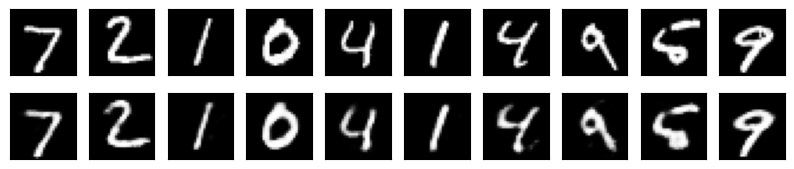

In [6]:
plt.figure(figsize=(n, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax2 = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

plt.show()